# Plant Seedlings Classification - Computer Vision Project

| Project Submission| Date |
| --- | --- |
| Rob Barker | October 12, 2024 |
| Filename | RobBarker_CV_PlantSeeding_FC.html/ipynb | 
| Course | Computer Vision (CNN) |

---
---

## Problem Statement

### Context

In recent times, the field of agriculture has been in urgent need of modernizing, since the amount of manual work people need to put in to check if plants are growing correctly is still highly extensive. Despite several advances in agricultural technology, people working in the agricultural industry still need to have the ability to sort and recognize different plants and weeds, which takes a lot of time and effort in the long term. The potential is ripe for this trillion-dollar industry to be greatly impacted by technological innovations that cut down on the requirement for manual labor, and this is where Artificial Intelligence can actually benefit the workers in this field, as **the time and energy required to identify plant seedlings will be greatly shortened by the use of AI and Deep Learning.** The ability to do so far more efficiently and even more effectively than experienced manual labor, could lead to better crop yields, the freeing up of human inolvement for higher-order agricultural decision making, and in the long term will result in more sustainable environmental practices in agriculture as well.


### Objective

The aim of this project is to Build a Convolutional Neural Network to classify plant seedlings into their respective categories.

### Data Dictionary

The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has recently released a dataset containing **images of unique plants belonging to 12 different species.**

- The dataset can be download from Olympus.
- The data file names are:
    - images.npy
    - Labels.csv
- Due to the large volume of data, the images were converted to the images.npy file and the labels are also put into Labels.csv, so that you can work on the data/project seamlessly without having to worry about the high data volume.

- The goal of the project is to create a classifier capable of determining a plant's species from an image.

**List of Species**

- Black-grass
- Charlock
- Cleavers
- Common Chickweed
- Common Wheat
- Fat Hen
- Loose Silky-bent
- Maize
- Scentless Mayweed
- Shepherds Purse
- Small-flowered Cranesbill
- Sugar beet

---
---
# Setup Environment

## Development Environment
* Local development with Visual Studio Code.
* Jupyter Notebook and Python 3.11.7 with Anaconda3. 
* Google Colab/Drive not used.
* Generated HTML using the jupyter cli

   ```jupyter nbconvert --to html RobBarker_CV_PlantSeeding_FC.html.ipynb```

* Added --- (markdown) lines for easier readability for myself. 

## Formatting Notes
* Moved helper functions into separate sections according to task.
* Added line separators for readability.

## Importing necessary libraries

In [232]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
%pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 opencv-python==4.8.0.76 -q --user

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math
import os
import cv2                                                                                       # Importing openCV for image processing

# Tensorflow modules
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential                                                   # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import Input,Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization # Defining all the layers to build our CNN Model
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.applications import VGG16

 # Importing the optimizers which can be used in our model
from sklearn import preprocessing                                                                # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix                                                     # Importing confusion_matrix to plot the confusion matrix
from sklearn.preprocessing import LabelBinarizer
from sklearn import metrics

# Display images using OpenCV
#from google.colab.patches import cv2_imshow                                                      # Importing cv2_imshow from google.patches to display images
from sklearn.model_selection import train_test_split
from tensorflow.keras import backend
from keras.callbacks import ReduceLROnPlateau
import random

from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

# To suppress warnings.
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)

Note: you may need to restart the kernel to use updated packages.


## Loading the dataset

In [87]:
# Load dataset.
plant_df_org = pd.read_csv("/Users/barkz/Desktop/GL Projects/Plant-Seeding-Classification/Labels.csv")
plant_df = plant_df_org.copy()

# Load the image file of dataset
plant_images = np.load("/Users/barkz/Desktop/GL Projects/Plant-Seeding-Classification/images.npy")  

---
---
# Data Overview

Summarization of all the data set elements that include:, Top 5 rows, bottom 5 rows, data info/type, data shape, image information (size, pixels, color) and distribution.

In [3]:
# Check the first few rows of the dataset.
plant_df.head()

Label
0  Small-flowered Cranesbill
1  Small-flowered Cranesbill
2  Small-flowered Cranesbill
3  Small-flowered Cranesbill
4  Small-flowered Cranesbill

In [4]:
# Retrieve last few rows of the copied dataset.
plant_df.tail()

Label
4745  Loose Silky-bent
4746  Loose Silky-bent
4747  Loose Silky-bent
4748  Loose Silky-bent
4749  Loose Silky-bent

In [5]:
# Get dataset information.
plant_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4750 entries, 0 to 4749
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   4750 non-null   object
dtypes: object(1)
memory usage: 37.2+ KB


**Observations:**
* Dataset contains all 4,750 object datatypes.

In [6]:
# Check for missing values in the dataset, Null.
null_values = plant_df.isnull().sum()

# Check for missing values in the dataset, NaN.
nan_values = plant_df.isna().sum()

# Output if there are any missing data points in the dataset.
if null_values.sum() or nan_values.sum() > 0:
    print("There are missing data points in the dataset.")
    
    # List columns with missing values.
    null_columns = null_values[null_values > 0]
    nan_columns = nan_values[nan_values > 0]

    print("Columns with null values:")
    print(null_columns)

    print("Columns with NaN values:")
    print(nan_columns)
else:
    print("There are no Nan or null data points in the dataset.")


There are no Nan or null data points in the dataset.


**Observations**
* There are no NaN or null values in the dataset.

In [7]:
# View plant images dataset.
plant_images

array([[[[ 35,  52,  78],
         [ 36,  49,  76],
         [ 31,  45,  69],
         ...,
         [ 78,  95, 114],
         [ 76,  93, 110],
         [ 80,  95, 109]],

        [[ 33,  46,  68],
         [ 37,  50,  73],
         [ 48,  65,  83],
         ...,
         [ 81,  96, 113],
         [ 74,  89, 105],
         [ 83,  95, 109]],

        [[ 34,  50,  68],
         [ 35,  52,  72],
         [ 70,  85, 101],
         ...,
         [ 83,  97, 112],
         [ 79,  94, 108],
         [ 79,  94, 107]],

        ...,

        [[ 35,  50,  69],
         [ 42,  57,  73],
         [ 42,  57,  72],
         ...,
         [ 60,  76,  92],
         [ 67,  81,  97],
         [ 64,  77,  95]],

        [[ 36,  52,  67],
         [ 48,  63,  78],
         [ 41,  57,  73],
         ...,
         [ 44,  66,  83],
         [ 58,  76,  91],
         [ 57,  74,  90]],

        [[ 44,  58,  70],
         [ 43,  57,  73],
         [ 40,  55,  72],
         ...,
         [ 41,  70,  92],
        

In [8]:
# Retrieve number of rows and columns using the shape attribute of the DataFrame.
rows, columns = plant_df.shape

# Print the number of rows and columns from the dataset. Output is formatted into thousands. 
# There are only 9 columns but for consistency, the output includes (,) format.
print(f'Number of Rows: {rows:,}')
print(f'Number of Columns: {columns:,}')

Number of Rows: 4,750
Number of Columns: 1


In [9]:
# Retrieve number of rows and columns using the shape attribute of the images dataset.
plant_images.shape

(4750, 128, 128, 3)

**Observations**
* Plant Labels
    * There are 4,750 rows and 1 columns in the dataset.
* Plant Images (4750, 128, 128, 3)
    * 4750: This is the number of images in the dataset.
    * 128: This is the height of each image has a height of 128 pixels.
    * 128: This is the width of each image in pixels, a width of 128 pixels.
    * 3: This represents the number of color channels in each image. Since the value is 3, it indicates that the images are in RGB format, with three channels corresponding to Red, Green, and Blue.

In [10]:
# Check datattypes to ensure pixels within the expected range.
print(f'Data type of plant_images: {plant_images.dtype}')
print(f'Min pixel value: {plant_images.min()}')
print(f'Max pixel value: {plant_images.max()}')

Data type of plant_images: uint8
Min pixel value: 0
Max pixel value: 255


**Observations**
* Pixel values are within range of 0 - 255.

In [11]:
# Check different plants in the dataset.
class_distribution = plant_df['Label'].value_counts()
print(class_distribution)

Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Common wheat                 221
Maize                        221
Name: Label, dtype: int64


**Observations**
* There are 12 uniques plant types in the dataset.

In [12]:
# Check for any NaN values in the array.
print(f'Any NaN values in plant_images: {np.isnan(plant_images).any()}')

Any NaN values in plant_images: False


**Observations**
* There are no NaN values in the dataset. 

In [13]:
# Verify that all images have consistent dimensions.
unique_shapes = np.unique([img.shape for img in plant_images], axis=0)
print(f'Unique image shapes: {unique_shapes}')

Unique image shapes: [[128 128   3]]


**Observations**
* All images have consistent, 128x128 dimensions with 3 channels (RGB).

In [14]:
# Get statistical information (mean, standard deviation) for pixel values.
print(f'Mean pixel value: {plant_images.mean()}')
print(f'Standard deviation of pixel values: {plant_images.std()}')

Mean pixel value: 70.04363745545504
Standard deviation of pixel values: 31.996876308515


**Observations**
* Mean pixel value: 70
* STD of pixel values: 32

---
---
# Exploratory Data Analysis

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you understand the data better.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

1. How are these different category plant images different from each other?
2. Is the dataset provided an imbalance? (Check with using bar plots)

## Helper Functions

In [88]:
# Plot random images from each of the class.
def plot_images(images,labels):
  num_classes=10 # Number of Classes
  categories=np.unique(labels)
  keys=dict(labels['Label']) # Obtaing the unique classes from y_train
  rows = 3 # Defining number of rows=3
  cols = 4 # Defining number of columns=4
  fig = plt.figure(figsize=(10, 8)) # Defining the figure size to 10x8
  for i in range(cols):
      for j in range(rows):
          random_index = np.random.randint(0, len(labels)) # Generating random indices from the data and plotting the images
          ax = fig.add_subplot(rows, cols, i * rows + j + 1) # Adding subplots with 3 rows and 4 columns
          ax.imshow(images[random_index, :])# Plotting the image
          ax.set_title(keys[random_index])
  plt.show()

## Analysis

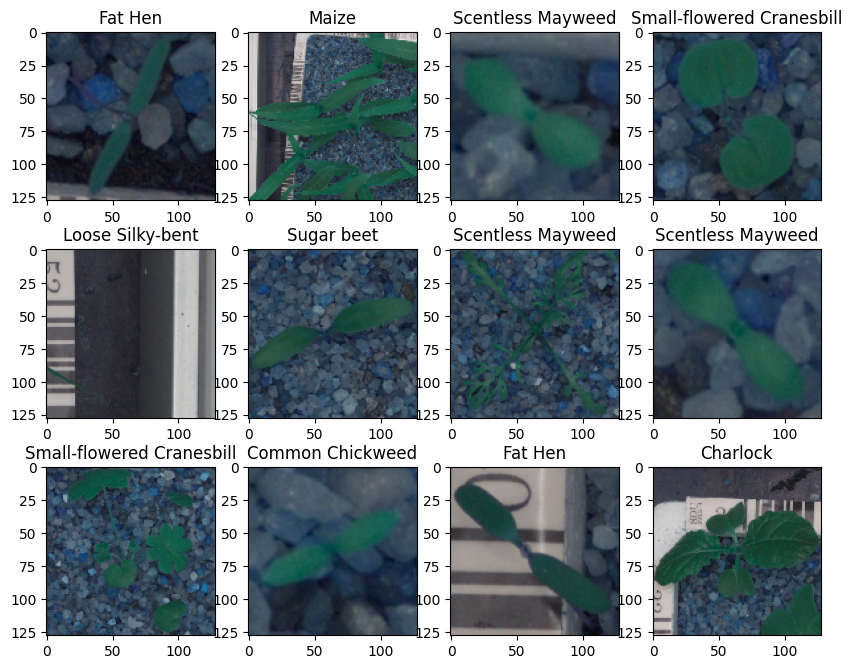

In [89]:
# Plot the 12 unique plant images.plant_images.
plot_images(plant_images,plant_df)

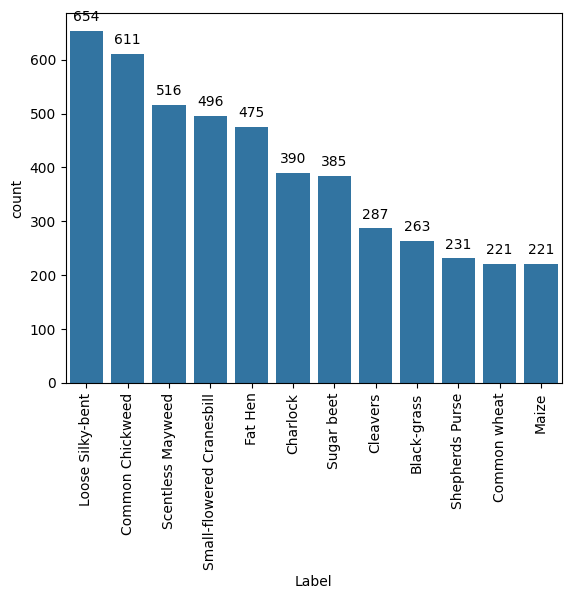

In [90]:
# Count each label and sort them in descending order.
label_counts = plant_df['Label'].value_counts().sort_values(ascending=False)

# Create a count plot with the sorted labels.
ax = sns.countplot(x=plant_df['Label'], order=label_counts.index)
plt.xticks(rotation='vertical')

# Add values to the bars.
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

In [91]:
skewness = plant_df['Label'].value_counts().skew()
print(f'Skewness of the Label data: {skewness}')

Skewness of the Label data: 0.34509359058206984


**Observations**
* Loose Silky-bent is the most recurring plant at 654.
* Common Chickweed is second with 611.
* The data is slightly right skewed. 

---
---
# Data Pre-Processing

### Convert the BGR images to RGB images.

In [92]:
# Converting the images from BGR to RGB using cvtColor function of OpenCV.
for i in range(len(plant_images)):
  plant_images[i] = cv2.cvtColor(plant_images[i], cv2.COLOR_BGR2RGB) 

# Check if an image is in RGB format.
def is_rgb(image):
    # Are the first pixel blue and red channels are swapped.
    return (image[..., 0] != image[..., 2]).any()

# Verify the conversion for each image.
conversion_successful = all(is_rgb(image) for image in plant_images)

# Output success or not.
if conversion_successful:
    print("All images have been successfully converted to RGB.")
else:
    print("Some images were not converted to RGB.")

All images have been successfully converted to RGB.


**Observations**
* All images have been converted properly.

### Resize the images

In [93]:
# Resize images 128x128 to 64x64.
plant_images_resized=[]
height = 64
width =  64
dimensions = (width, height)
for i in range(len(plant_images)):
  plant_images_resized.append( 
    cv2.resize(
      plant_images[i], 
      dimensions, 
      interpolation=cv2.INTER_LINEAR
    )
)
  
# Check if an image has the correct dimensions.
def is_correct_size(image, target_dimensions):
    return image.shape[:2] == target_dimensions

# Verify the resizing for each image.
target_dimensions = (height, width)
resizing_successful = all(is_correct_size(image, target_dimensions) for image in plant_images_resized)

# Output success or not.
if resizing_successful:
    print("All images have been successfully resized to 64x64.")
else:
    print("Some images were not resized correctly.")

All images have been successfully resized to 64x64.


#### Images pre Resize

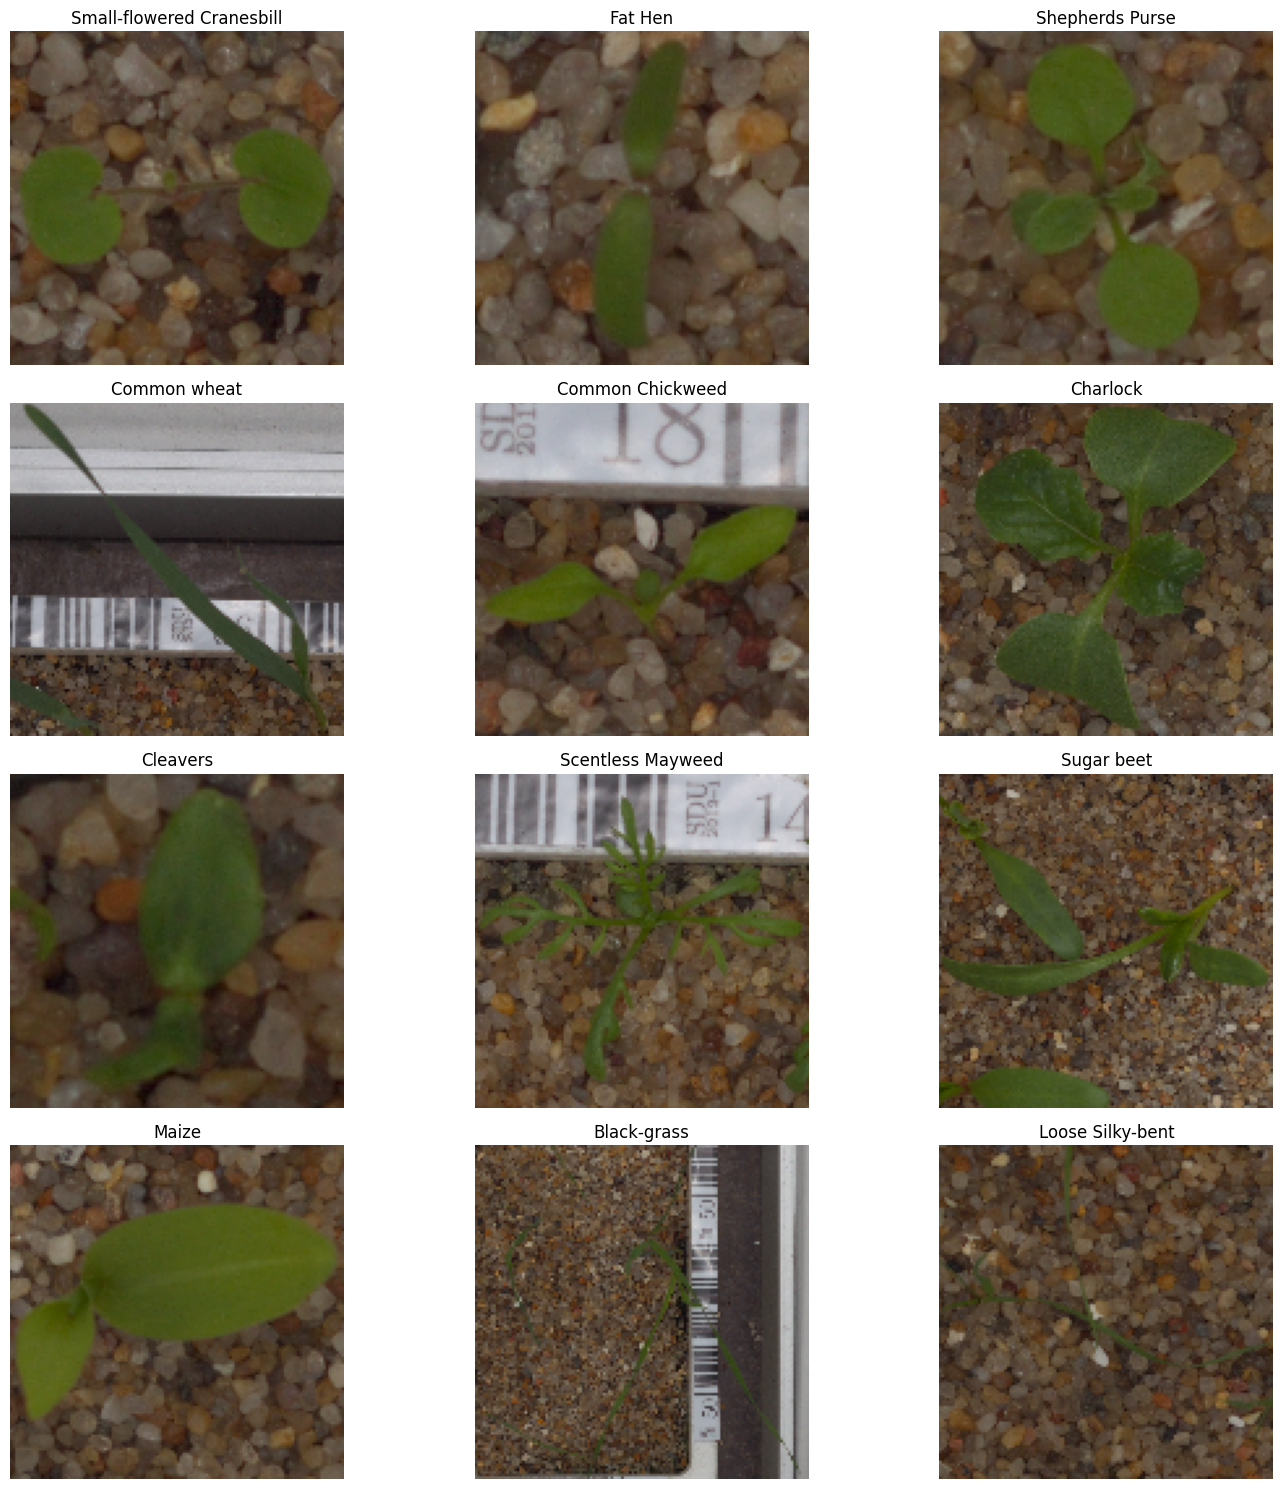

In [94]:
# Display the images before resizing.
# Notice the difference in the image quality.
unique_labels = plant_df['Label'].unique()

# Plot one image for each unique label.
plt.figure(figsize=(15, 15))
num_rows = 4
num_cols = 3
max_images = num_rows * num_cols

for i, label in enumerate(unique_labels[:max_images]):
    # Find the first image corresponding to the current label.
    image_index = plant_df[plant_df['Label'] == label].index[0]
    image = plant_images[image_index]
    
    # Plot the image.
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(image)
    plt.title(label)
    plt.axis('off')

plt.tight_layout()
plt.show()

**Observations**
* Images look good and clear. 

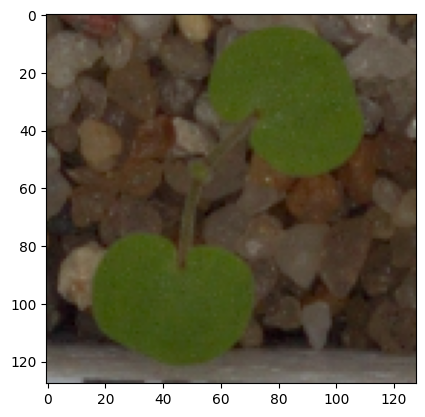

In [95]:
# Plot one select image from original images to show individual quality.
plt.imshow(plant_images[4])

#### Images post Resize

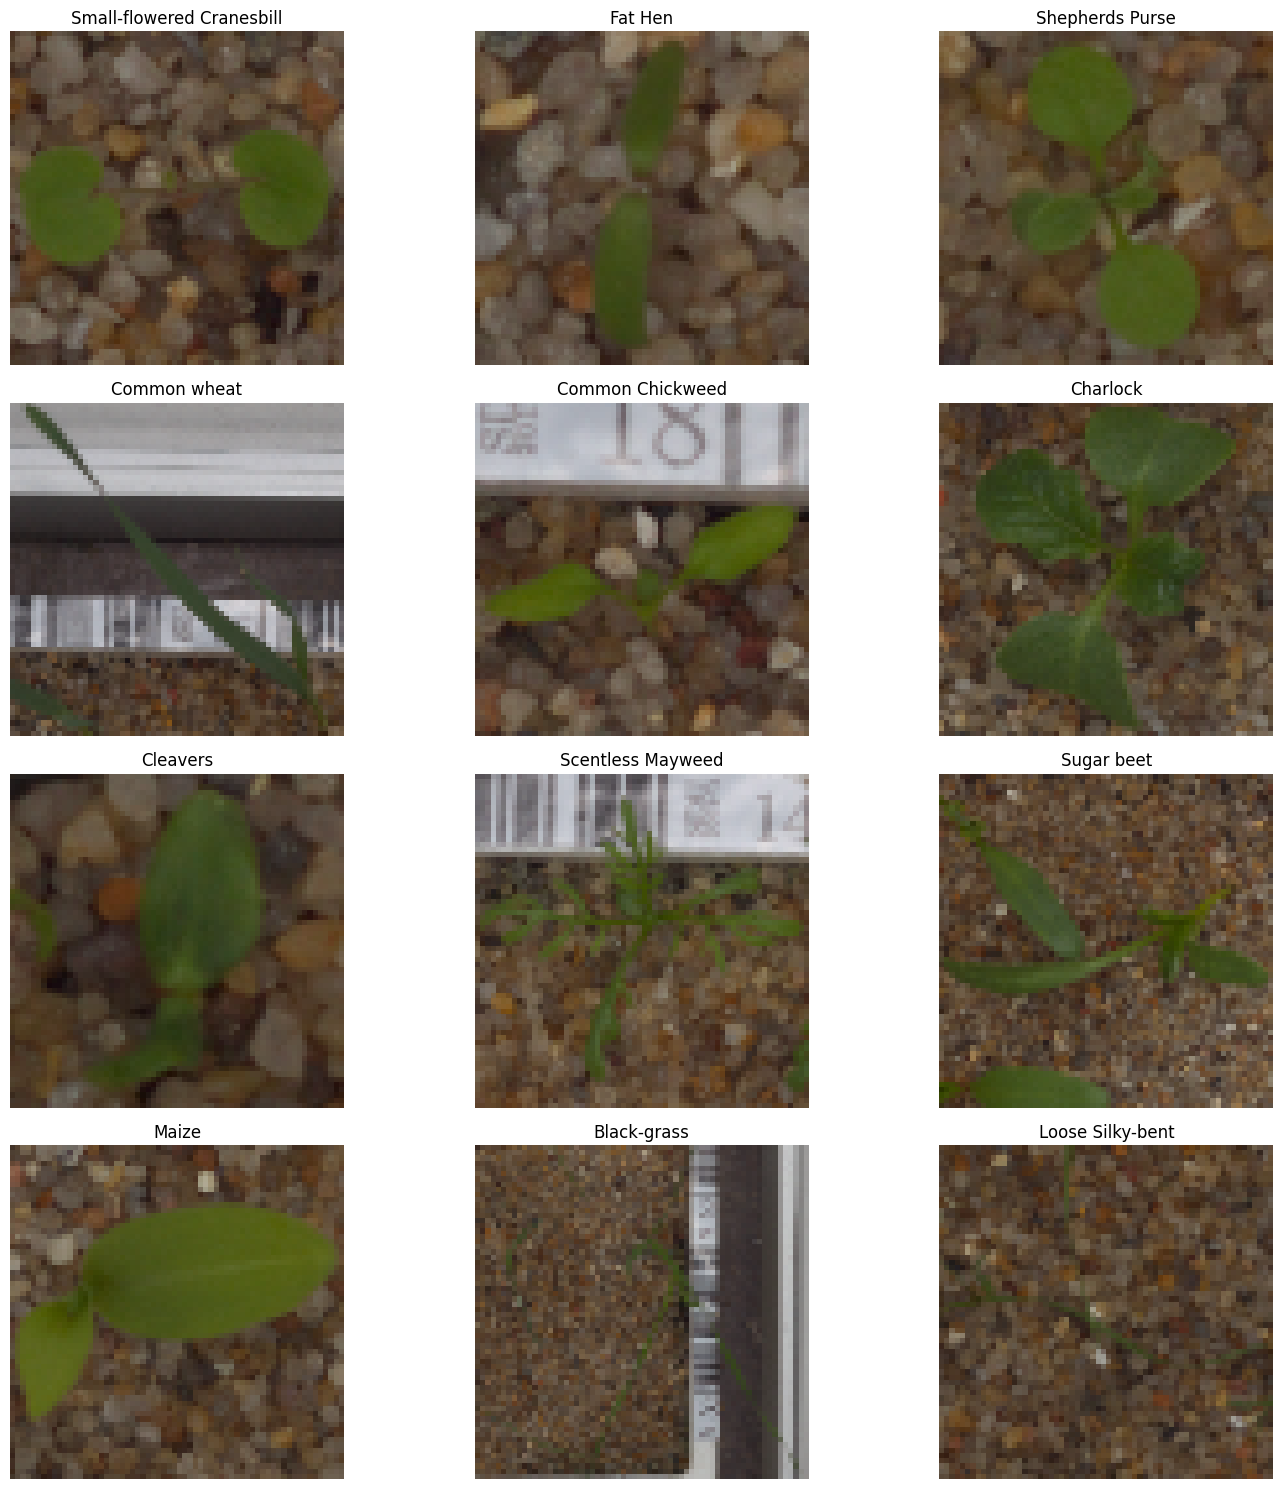

In [96]:
# Display the images after resizing.
# Notice the difference in the image quality.
unique_labels = plant_df['Label'].unique()

# Plot one image for each unique label
plt.figure(figsize=(15, 15))
num_rows = 4
num_cols = 3
max_images = num_rows * num_cols

for i, label in enumerate(unique_labels[:max_images]):
    # Find the first image corresponding to the current label.
    image_index = plant_df[plant_df['Label'] == label].index[0]
    image = plant_images_resized[image_index]
    
    # Plot the image
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(image)
    plt.title(label)
    plt.axis('off')

plt.tight_layout()
plt.show()

**Observations**
* Images a bit more pixelated. 

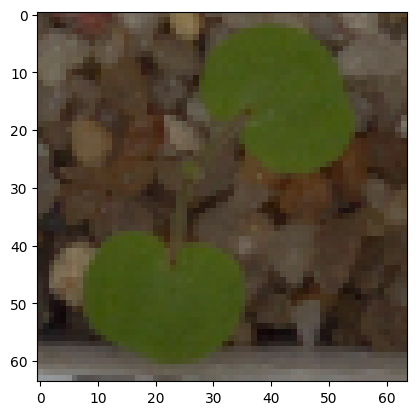

In [97]:
# Plot one image from resized images to show individual quality.
plt.imshow(plant_images_resized[4])

**Observations**
* Looking individually at a plant it is pixelated. 

### Data Preparation for Modeling

- Before you proceed to build a model, you need to split the data into train, test, and validation to be able to evaluate the model that you build on the train data
- You'll have to encode categorical features and scale the pixel values.
- You will build a model using the train data and then check its performance

### Split the dataset

In [98]:
# Print the number of resized images.
print(f"Length of images_decreased: {len(plant_images_resized)}")

# Print the number of labels in the DataFrame.
print(f"Length of labels: {len(plant_df)}")
labels_array = plant_df['Label'].to_numpy()

# Print the shape of the resized images array.
print(f"Shape of images_decreased: {np.shape(plant_images_resized)}")

# Ensure the number of images matches.
images_decreased = plant_images_resized[:len(labels_array)]

# Split the data.
X_temp, X_test, y_temp, y_test = train_test_split(images_decreased, labels_array, test_size=0.1, random_state=42, stratify=labels_array)

# Further split the data into training and validation sets.
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1, random_state=42, stratify=y_temp)

Length of images_decreased: 4750
Length of labels: 4750
Shape of images_decreased: (4750, 64, 64, 3)


In [99]:
# Convert the lists to numpy arrays.
X_train = np.array(X_train)
X_val = np.array(X_val)
X_test = np.array(X_test)

# Print shape of the training, validation, and test sets.
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

# Calculate the total number of samples.
total_samples = len(X_train) + len(X_val) + len(X_test)

# Calculate the percentage of samples in each set.
train_percentage = (len(X_train) / total_samples) * 100
val_percentage = (len(X_val) / total_samples) * 100
test_percentage = (len(X_test) / total_samples) * 100

# Data split percentages.
print(f"\nTraining set: {train_percentage:.2f}%")
print(f"Validation set: {val_percentage:.2f}%")
print(f"Test set: {test_percentage:.2f}%")

(3847, 64, 64, 3) (3847,)
(428, 64, 64, 3) (428,)
(475, 64, 64, 3) (475,)

Training set: 80.99%
Validation set: 9.01%
Test set: 10.00%


### Encode the target labels

In [100]:
# Convert labels from names to one hot vectors.
enc = LabelBinarizer()                             # Complete the code to intialize the labelBinarizer
y_train_encoded = enc.fit_transform(y_train)       # Complete the code to fit and transform y_train
y_val_encoded=enc.transform(y_val)                  # Complete the code to transform y_val
y_test_encoded=enc.transform(y_test)  

In [101]:
y_train_encoded.shape,y_val_encoded.shape,y_test_encoded.shape  # Complete the code to check the shape of train, validation and test data

((3847, 12), (428, 12), (475, 12))

### Data Normalization

In [102]:
# Complete the code to normalize the image pixels of train, test and validation data.
X_train_normalized = X_train.astype('float32')/255.0
X_val_normalized = X_val.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0

---
---
# Model Building

### Helper Functions

In [173]:
# This function will return a dataframe of metrics.
def model_performance_classification_sklearn(model, predictors, target, name):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred_p = model.predict(predictors)
    pred = np.argmax(pred_p,axis=1)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred, average='weighted')  # to compute Recall
    precision = precision_score(target, pred, average='weighted')  # to compute Precision
    f1 = f1_score(target, pred, average='weighted')  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Model": name, "Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

### Building Model 1

In [174]:
# Clearing backend.
backend.clear_session()

In [175]:
# Fixing the seed for random number generators.
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [176]:
# Intializing a sequential model
model1 = Sequential() # Complete the code to intialize a sequential model

# Assuming you have 10 classes in your classification problem
num_classes = 12

# Complete the code to add the first conv layer with 128 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of images
model1.add(Conv2D(32, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Complete the code to add the max pooling to reduce the size of output of first conv layer
model1.add(MaxPooling2D((2, 2), padding = 'same'))

# Complete the code to create two similar convolution and max-pooling layers activation = relu
model1.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model1.add(MaxPooling2D((2, 2), padding = 'same'))

model1.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model1.add(MaxPooling2D((2, 2), padding = 'same'))

# Complete the code to flatten the output of the conv layer after max pooling to make it ready for creating dense connections
model1.add(Flatten())

# Complete the code to add a fully connected dense layer with 16 neurons
model1.add(Dense(128, activation='relu'))
model1.add(Dropout(0.3))
# Complete the code to add the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem
model1.add(Dense(num_classes, activation='softmax'))

# Complete the code to use the Adam Optimizer
opt=Adam()
# Complete the code to Compile the model using suitable metric for loss fucntion
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Complete the code to generate the summary of the model
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 8, 8, 32)          0

In [177]:
# Fit the model on train and validation data.
history_1 = model1.fit(
            X_train_normalized, y_train_encoded,
            epochs=50,
            validation_data=(X_val_normalized, y_val_encoded),
            batch_size=64,
            verbose=2
)

# Convert one-hot encoded labels back to original class labels.
y_test_original = np.argmax(y_test_encoded, axis=1)

# Report the performance of the model.
model_performance_classification_sklearn(model1, X_test_normalized, y_test_original, 'Model 1')


Epoch 1/50
61/61 - 5s - loss: 2.4023 - accuracy: 0.1648 - val_loss: 2.2613 - val_accuracy: 0.2780 - 5s/epoch - 75ms/step
Epoch 2/50
61/61 - 4s - loss: 1.9272 - accuracy: 0.3379 - val_loss: 1.6082 - val_accuracy: 0.4206 - 4s/epoch - 69ms/step
Epoch 3/50
61/61 - 4s - loss: 1.6417 - accuracy: 0.4159 - val_loss: 1.4895 - val_accuracy: 0.4743 - 4s/epoch - 68ms/step
Epoch 4/50
61/61 - 4s - loss: 1.4782 - accuracy: 0.4669 - val_loss: 1.3437 - val_accuracy: 0.5164 - 4s/epoch - 73ms/step
Epoch 5/50
61/61 - 4s - loss: 1.3565 - accuracy: 0.5134 - val_loss: 1.2050 - val_accuracy: 0.5584 - 4s/epoch - 73ms/step
Epoch 6/50
61/61 - 4s - loss: 1.1858 - accuracy: 0.5792 - val_loss: 1.1135 - val_accuracy: 0.6262 - 4s/epoch - 73ms/step
Epoch 7/50
61/61 - 5s - loss: 1.0857 - accuracy: 0.6223 - val_loss: 0.9877 - val_accuracy: 0.6565 - 5s/epoch - 75ms/step
Epoch 8/50
61/61 - 5s - loss: 0.9864 - accuracy: 0.6512 - val_loss: 0.9646 - val_accuracy: 0.6589 - 5s/epoch - 82ms/step
Epoch 9/50
61/61 - 4s - loss: 0.

Model  Accuracy    Recall  Precision        F1
0  Model 1  0.776842  0.776842   0.779542  0.774651

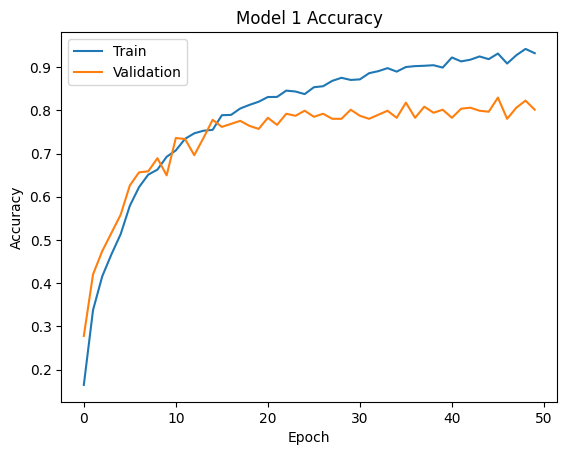

In [178]:
# Plot the loss and accuracy of the model.
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model 1 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Observations:**
* The training accuracy is significantly higher (93.22%) compared to the validation accuracy (80.14%). This shows the model is performing much better on the training data than on the validation data.
* The validation loss decreases initially but starts to increase towards the end of training. 
* Model is overfitting. The high training accuracy combined with a significantly lower validation accuracy and increasing validation loss towards the end of training are strong indicators of overfitting.

In [179]:
# Evaluate the model on the test data.
accuracy = model1.evaluate(X_test_normalized, y_test_encoded, verbose=2)

# Print the accuracy of the model on test data.
accuracy

15/15 - 0s - loss: 0.9387 - accuracy: 0.7768 - 238ms/epoch - 16ms/step


[0.9386667609214783, 0.7768421173095703]

**Observations:**
* The model achieved a loss of 0.9387 and an accuracy of 77.68% on the test data.
* The accuracy indicates that the model performs reasonably well, correctly predicting about 78% of the test samples. There is room for improvement, as indicated by the loss value.

In [180]:
# Get the output as probablities for each category.
y_pred=model1.predict(X_test_normalized)

15/15 [==============================] - 0s 15ms/step


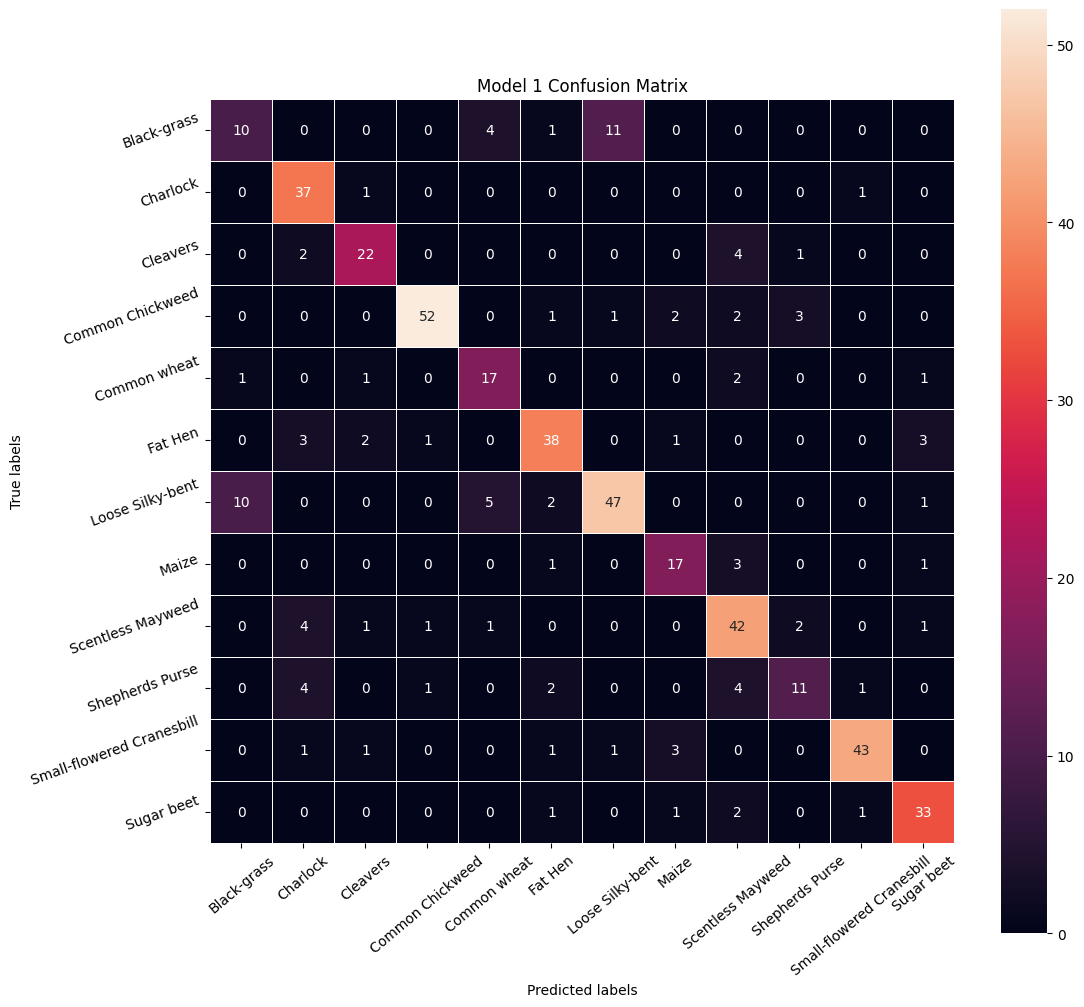

In [182]:
# Obtaining the categorical values from y_test_encoded and y_pred.
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which 
# is also predefined in tensorflow module.
confusion_matrix = tf.math.confusion_matrix(y_test_arg, y_pred_arg) # Complete the code to plot the confusion matrix
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
# Setting the labels to both the axes
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Model 1 Confusion Matrix');
ax.xaxis.set_ticklabels(list(enc.classes_),rotation=40)
ax.yaxis.set_ticklabels(list(enc.classes_),rotation=20)
plt.show()

In [183]:
# Plotting the classification report
print("Model 1 Classification Report")
cr=metrics.classification_report(y_test_arg,y_pred_arg) # Complete the code to plot the classification report
print(cr)

Model 1 Classification Report
              precision    recall  f1-score   support

           0       0.48      0.38      0.43        26
           1       0.73      0.95      0.82        39
           2       0.79      0.76      0.77        29
           3       0.95      0.85      0.90        61
           4       0.63      0.77      0.69        22
           5       0.81      0.79      0.80        48
           6       0.78      0.72      0.75        65
           7       0.71      0.77      0.74        22
           8       0.71      0.81      0.76        52
           9       0.65      0.48      0.55        23
          10       0.93      0.86      0.90        50
          11       0.82      0.87      0.85        38

    accuracy                           0.78       475
   macro avg       0.75      0.75      0.75       475
weighted avg       0.78      0.78      0.77       475



**Obversations**
* The model performs well overall with an accuracy of 78%.

---
---
# Model Performance Improvement

In [157]:
# Code to monitor val_accuracy.
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

### Building Model 2

#### Data Augmentation
* Rotation
* Fill

In [190]:
# Complete the code to set the rotation_range to 20
train_datagen = ImageDataGenerator(
                              rotation_range=20,
                              fill_mode='nearest'
                              )

In [191]:
# Clear backend session.
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [192]:
model2 = Sequential()

# Complete the code to add the first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension images
model2.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Complete the code to add max pooling to reduce the size of output of first conv layer
model2.add(MaxPooling2D((2, 2), padding = 'same'))

model2.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model2.add(MaxPooling2D((2, 2), padding = 'same'))
model2.add(BatchNormalization())

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model2.add(Flatten())

# Adding a fully connected dense layer with 16 neurons
model2.add(Dense(16, activation='relu'))

# Complete the code to add dropout with dropout_rate=0.3
model2.add(Dropout(0.25))
# Complete the code to add the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem
model2.add(Dense(12, activation='softmax'))

# Complete the code to initialize Adam Optimimzer
opt=Adam()
# Complete the code to Compile model
model2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 batch_normalization (Batch  (None, 16, 16, 32)        128       
 Normalization)                                                  
                                                        

In [193]:
# Complete the code to fit the model on train data with batch_size=64 and epochs=30.
epochs = 50
batch_size = 64

history = model2.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                   batch_size=batch_size,
                                   shuffle=False),
                                   epochs=epochs,
                                   steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                                   validation_data=(X_val_normalized,y_val_encoded),
                                   verbose=1,callbacks=[learning_rate_reduction])

Epoch 1/50
60/60 [==============================] - 5s 80ms/step - loss: 2.1161 - accuracy: 0.2577 - val_loss: 2.3871 - val_accuracy: 0.1752 - lr: 0.0010
Epoch 2/50
60/60 [==============================] - 5s 79ms/step - loss: 1.6174 - accuracy: 0.4420 - val_loss: 2.2758 - val_accuracy: 0.1822 - lr: 0.0010
Epoch 3/50
60/60 [==============================] - 5s 80ms/step - loss: 1.4076 - accuracy: 0.5096 - val_loss: 2.1772 - val_accuracy: 0.2126 - lr: 0.0010
Epoch 4/50
60/60 [==============================] - 5s 77ms/step - loss: 1.3053 - accuracy: 0.5448 - val_loss: 2.0782 - val_accuracy: 0.3271 - lr: 0.0010
Epoch 5/50
60/60 [==============================] - 5s 76ms/step - loss: 1.2123 - accuracy: 0.5675 - val_loss: 1.7751 - val_accuracy: 0.5607 - lr: 0.0010
Epoch 6/50
60/60 [==============================] - 5s 78ms/step - loss: 1.1298 - accuracy: 0.6019 - val_loss: 1.5988 - val_accuracy: 0.5093 - lr: 0.0010
Epoch 7/50
60/60 [==============================] - 5s 77ms/step - loss: 1.1

In [194]:
# Report the performance of the model.
model_performance_classification_sklearn(model2, X_test_normalized, y_test_original, 'Model 2')

15/15 [==============================] - 0s 19ms/step


Model  Accuracy    Recall  Precision        F1
0  Model 2  0.797895  0.797895   0.807582  0.796945

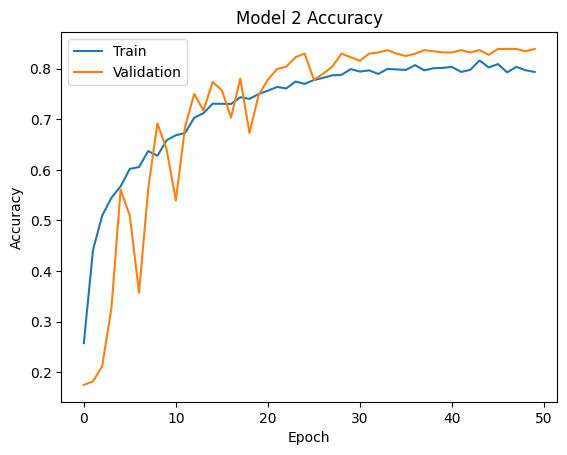

In [199]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model 2 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Observations:**
* The validation accuracy (83.88%) is higher than the training accuracy (79.33%), which is a positive sign indicating that the model is generalizing well to the validation data.
This shows the model is performing much better on the training data than on the validation data.
* The training and validation losses generally decrease over epochs, indicating that the model is learning.
* There is no significant sign of overfitting as the validation accuracy is higher than the training accuracy, and the validation loss does not increase significantly towards the end.

In [196]:
# Evaluate the model on the test data.
accuracy = model2.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 0s - loss: 0.7277 - accuracy: 0.7979 - 253ms/epoch - 17ms/step


**Observations:**
* The model achieved a loss of 0.7277 and an accuracy of 79.79% on the test data.
* The accuracy indicates that the model performs reasonably well, correctly predicting about 80% of the test samples.


In [197]:
# Obtain the output probabilities.
y_pred=model2.predict(X_test_normalized)

15/15 [==============================] - 0s 18ms/step


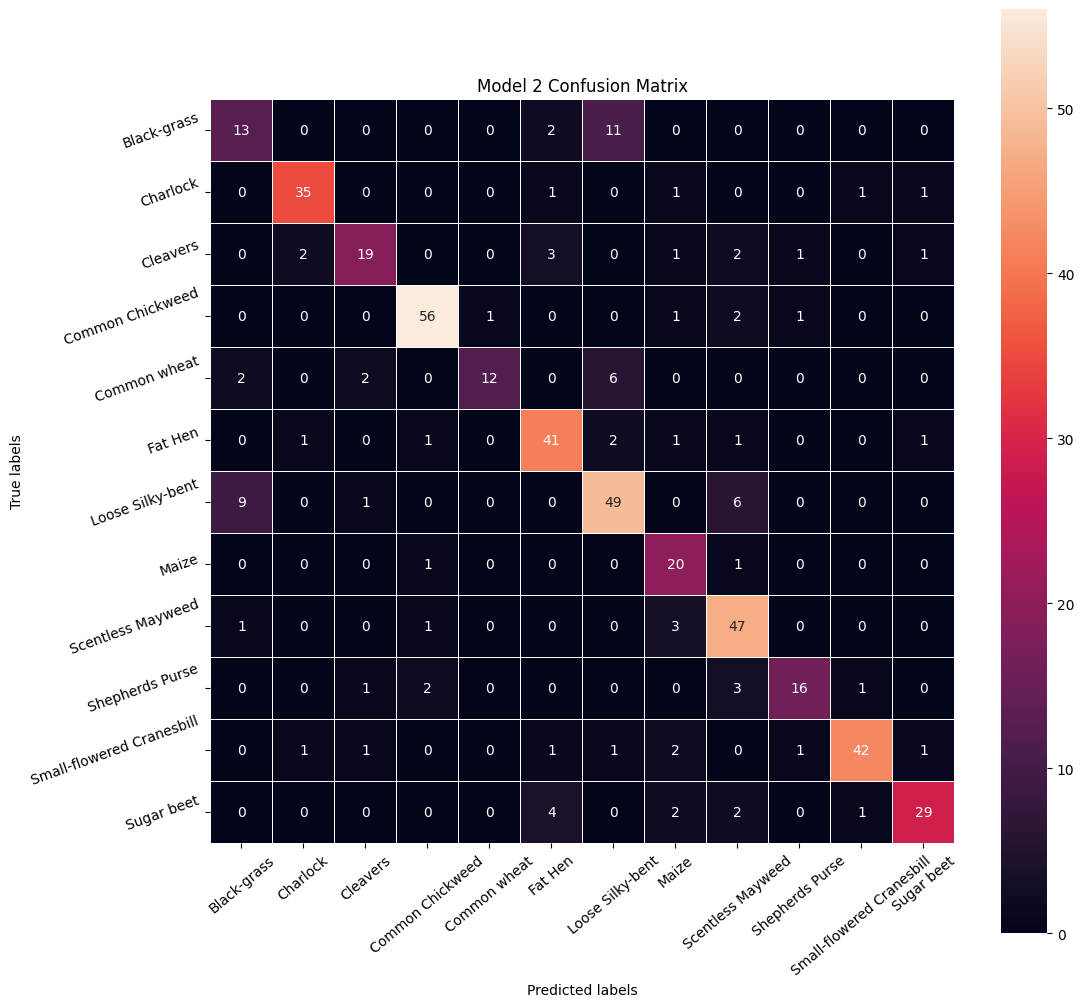

In [198]:
# Obtaining the categorical values from y_test_encoded and y_pred.
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined in tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg) 
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
# Setting the labels to both the axes
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Model 2 Confusion Matrix');
ax.xaxis.set_ticklabels(list(enc.classes_),rotation=40)
ax.yaxis.set_ticklabels(list(enc.classes_),rotation=20)
plt.show()

In [200]:
# Plotting the classification report
print("Model 2 Classification Report")
cr=metrics.classification_report(y_pred_arg, y_test_arg, zero_division=1)
print(cr)

Model 2 Classification Report
              precision    recall  f1-score   support

           0       0.50      0.52      0.51        25
           1       0.90      0.90      0.90        39
           2       0.66      0.79      0.72        24
           3       0.92      0.92      0.92        61
           4       0.55      0.92      0.69        13
           5       0.85      0.79      0.82        52
           6       0.75      0.71      0.73        69
           7       0.91      0.65      0.75        31
           8       0.90      0.73      0.81        64
           9       0.70      0.84      0.76        19
          10       0.84      0.93      0.88        45
          11       0.76      0.88      0.82        33

    accuracy                           0.80       475
   macro avg       0.77      0.80      0.78       475
weighted avg       0.81      0.80      0.80       475



**Obversations**
* The model performs well overall with an accuracy of 80%.

In [212]:
# Define a list of models and their names.
models = [
    (model1, 'Model 1'),
    (model2, 'Model 2')
]

# Print models performance.
for model, name in models:
    print(model_performance_classification_sklearn(model, X_test_normalized, y_test_original, name))

15/15 [==============================] - 0s 16ms/step
     Model  Accuracy    Recall  Precision        F1
0  Model 1  0.776842  0.776842   0.779542  0.774651
15/15 [==============================] - 0s 10ms/step
     Model  Accuracy    Recall  Precision        F1
0  Model 2  0.797895  0.797895   0.807582  0.796945


---
---

### Building Model 3

#### Data Augmentation
* Horizontal flip
* Vertical Flip
* Height Shift
* Width shift
* Rotation 
* Zoom
* Fill

In [202]:
train_datagen = ImageDataGenerator(
                              horizontal_flip = True,
                              vertical_flip = True, 
                              height_shift_range= 0.1, 
                              width_shift_range=0.1, 
                              rotation_range=20, 
                              shear_range = 0.1,
                              zoom_range=0.1,
                              fill_mode='nearest'
)

In [203]:
# Clear backend session.
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [205]:
vgg_model = VGG16(weights='imagenet', include_top = False, input_shape = (64,64,3))
vgg_model.summary()

58889256/58889256 [==============================] - 2s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                              

In [206]:
# Making all the layers of the VGG model non-trainable, freezing the weights.
for layer in vgg_model.layers:
    layer.trainable = False

In [207]:
# Intializing a sequential model
model3 = Sequential()
model3.add(vgg_model)
model3.add(Flatten())
model3.add(Dense(16, activation='relu'))
model3.add(Dropout(0.3))
model3.add(Dense(12, activation='softmax'))
opt=Adam()
model3.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 16)                32784     
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 12)                204       
                                                                 
Total params: 14747676 (56.26 MB)
Trainable params: 32988 (128.86 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [208]:
# Complete the code to fit the model on train data.
epochs = 50
batch_size = 64

history = model3.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                   batch_size=batch_size,
                                   shuffle=False),
                                   epochs=epochs,
                                   steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                                   validation_data=(X_val_normalized,y_val_encoded),
                                   verbose=1,callbacks=[learning_rate_reduction])

Epoch 1/50
60/60 [==============================] - 31s 518ms/step - loss: 2.4355 - accuracy: 0.1377 - val_loss: 2.3486 - val_accuracy: 0.2126 - lr: 0.0010
Epoch 2/50
60/60 [==============================] - 33s 546ms/step - loss: 2.3361 - accuracy: 0.1927 - val_loss: 2.2588 - val_accuracy: 0.2850 - lr: 0.0010
Epoch 3/50
60/60 [==============================] - 35s 582ms/step - loss: 2.2666 - accuracy: 0.2131 - val_loss: 2.1742 - val_accuracy: 0.3014 - lr: 0.0010
Epoch 4/50
60/60 [==============================] - 46s 775ms/step - loss: 2.1986 - accuracy: 0.2334 - val_loss: 2.0840 - val_accuracy: 0.3178 - lr: 0.0010
Epoch 5/50
60/60 [==============================] - 67s 1s/step - loss: 2.1165 - accuracy: 0.2635 - val_loss: 1.9994 - val_accuracy: 0.3411 - lr: 0.0010
Epoch 6/50
60/60 [==============================] - 52s 874ms/step - loss: 2.0600 - accuracy: 0.2760 - val_loss: 1.9618 - val_accuracy: 0.3388 - lr: 0.0010
Epoch 7/50
60/60 [==============================] - 70s 1s/step - l

In [209]:
# Report the performance of the model.
model_performance_classification_sklearn(model3, X_test_normalized, y_test_original, 'Model 3')

15/15 [==============================] - 5s 352ms/step


Model  Accuracy    Recall  Precision       F1
0  Model 3  0.435789  0.435789   0.319426  0.35037

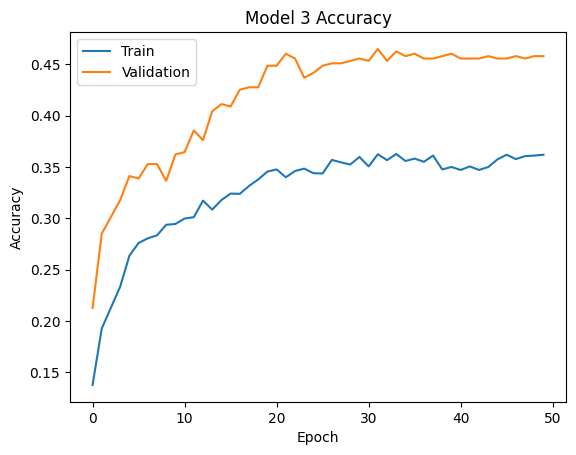

In [213]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model 3 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Observations:**
* Model performs poorly across all results. Low accuracy, recall, precision and F1 score.

In [214]:
# Evaluate the model on the test data.
accuracy = model3.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 4s - loss: 1.6067 - accuracy: 0.4358 - 4s/epoch - 237ms/step


**Observations:**
* The model achieved a loss of 1.6067 and an accuracy of 43.58% on the test data.
* The accuracy indicates that the model performs poorly. 


In [215]:
# Obtain the output probabilities.
y_pred=model3.predict(X_test_normalized)

15/15 [==============================] - 4s 234ms/step


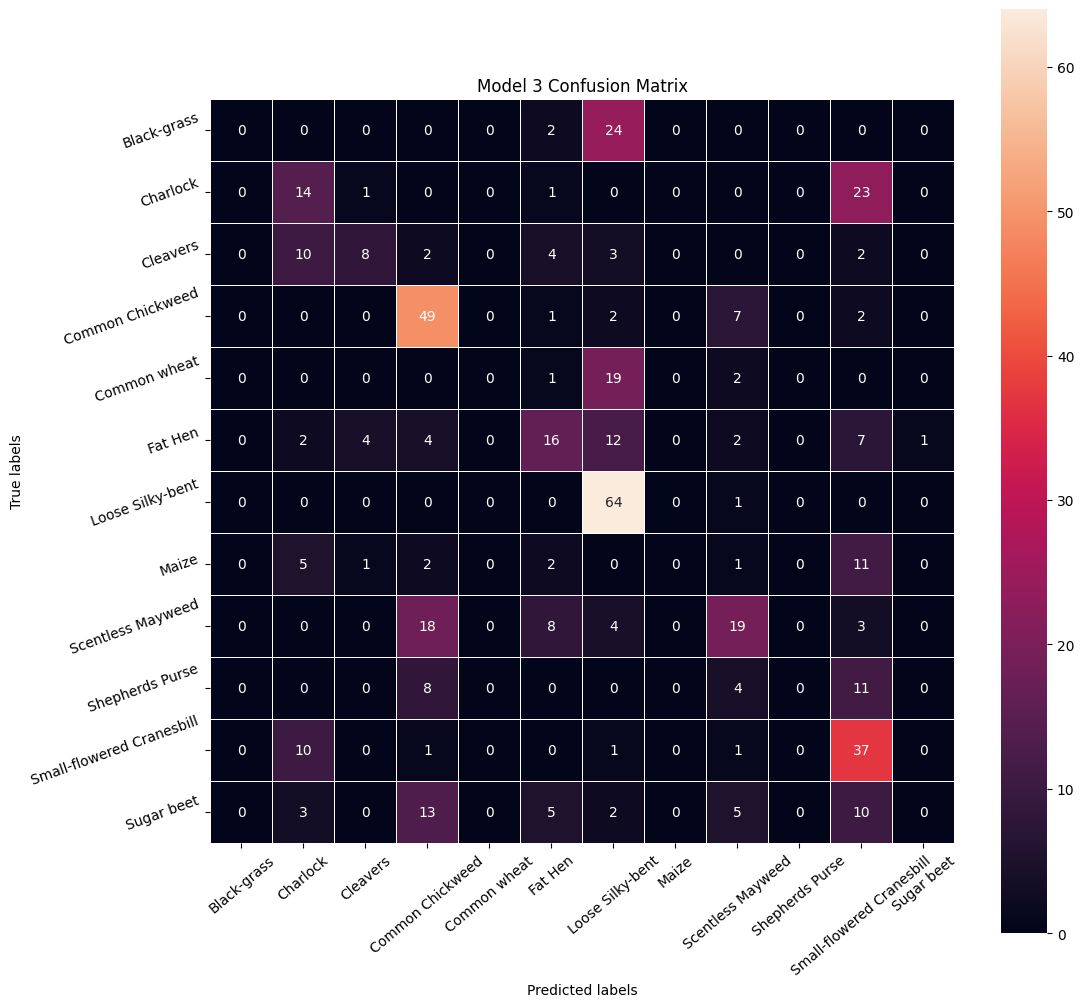

In [216]:
# Obtaining the categorical values from y_test_encoded and y_pred.
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined in tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg) 
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
# Setting the labels to both the axes
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Model 3 Confusion Matrix');
ax.xaxis.set_ticklabels(list(enc.classes_),rotation=40)
ax.yaxis.set_ticklabels(list(enc.classes_),rotation=20)
plt.show()

In [217]:
# Plotting the classification report.
cr=metrics.classification_report(y_pred_arg, y_test_arg, zero_division=1)
print(cr)

              precision    recall  f1-score   support

           0       0.00      1.00      0.00         0
           1       0.36      0.32      0.34        44
           2       0.28      0.57      0.37        14
           3       0.80      0.51      0.62        97
           4       0.00      1.00      0.00         0
           5       0.33      0.40      0.36        40
           6       0.98      0.49      0.65       131
           7       0.00      1.00      0.00         0
           8       0.37      0.45      0.40        42
           9       0.00      1.00      0.00         0
          10       0.74      0.35      0.47       106
          11       0.00      0.00      0.00         1

    accuracy                           0.44       475
   macro avg       0.32      0.59      0.27       475
weighted avg       0.70      0.44      0.52       475



**Obversations**
* The model performs poorly overall with an accuracy of 44%.
* Model is underfitting based on the low overall accuracy, low macro and weighted average F1-scores.
* The model appears to be too simple to capture the underlying patterns in the data, leading to poor performance on the test set. 

In [218]:
# Define a list of models and their names.
models = [
    (model1, 'Model 1'),
    (model2, 'Model 2'),
    (model3, 'Model 3')
]

# Print models performance.
for model, name in models:
    print(model_performance_classification_sklearn(model, X_test_normalized, y_test_original, name))

15/15 [==============================] - 0s 20ms/step
     Model  Accuracy    Recall  Precision        F1
0  Model 1  0.776842  0.776842   0.779542  0.774651
15/15 [==============================] - 0s 10ms/step
     Model  Accuracy    Recall  Precision        F1
0  Model 2  0.797895  0.797895   0.807582  0.796945
15/15 [==============================] - 3s 222ms/step
     Model  Accuracy    Recall  Precision       F1
0  Model 3  0.435789  0.435789   0.319426  0.35037


### Build Model 4

#### Data Augmentation
* Transfer learning from MobileNet.

In [219]:
# Clear backend session.
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [220]:
# Use MobileNet CNN.
image_input=Input(shape=(64,64,3))
base_model = MobileNet(input_tensor=image_input,weights='imagenet', include_top=False)

x = base_model.output
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(32, activation='relu')(x)
predictions = Dense(12, activation='softmax')(x)
model4 = Model(inputs=base_model.input, outputs=predictions)
model4.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy',metrics=['accuracy'])
model4.summary()

17225924/17225924 [==============================] - 0s 0us/step


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv1 (Conv2D)              (None, 32, 32, 32)        864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 32, 32, 32)        128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 32, 32, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 32, 32, 32)        288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 32, 32, 32)        128   

In [222]:
# Train the model on the new data.
batch_size = 32
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.8 ** x)
earlystop = EarlyStopping(patience=5)
history4 = model4.fit(
    X_train_normalized, y_train_encoded, batch_size=batch_size,
    epochs=50, 
    validation_data=(X_val_normalized, y_val_encoded),
    callbacks=[annealer, earlystop]
)

Epoch 1/50
121/121 [==============================] - 11s 92ms/step - loss: 0.8784 - accuracy: 0.7317 - val_loss: 1.0041 - val_accuracy: 0.7313 - lr: 0.0010
Epoch 2/50
121/121 [==============================] - 11s 92ms/step - loss: 0.6528 - accuracy: 0.8045 - val_loss: 1.0133 - val_accuracy: 0.7500 - lr: 8.0000e-04
Epoch 3/50
121/121 [==============================] - 12s 95ms/step - loss: 0.5343 - accuracy: 0.8349 - val_loss: 0.8932 - val_accuracy: 0.7687 - lr: 6.4000e-04
Epoch 4/50
121/121 [==============================] - 12s 98ms/step - loss: 0.4110 - accuracy: 0.8653 - val_loss: 0.6760 - val_accuracy: 0.8341 - lr: 5.1200e-04
Epoch 5/50
121/121 [==============================] - 12s 103ms/step - loss: 0.4416 - accuracy: 0.8679 - val_loss: 0.5054 - val_accuracy: 0.8645 - lr: 4.0960e-04
Epoch 6/50
121/121 [==============================] - 15s 124ms/step - loss: 0.2846 - accuracy: 0.9002 - val_loss: 0.3972 - val_accuracy: 0.8855 - lr: 3.2768e-04
Epoch 7/50
121/121 [================

In [223]:
# Report the performance of the model.
model_performance_classification_sklearn(model4, X_test_normalized, y_test_original, 'Model 4')

15/15 [==============================] - 1s 20ms/step


Model  Accuracy    Recall  Precision        F1
0  Model 4  0.896842  0.896842   0.898085  0.896296

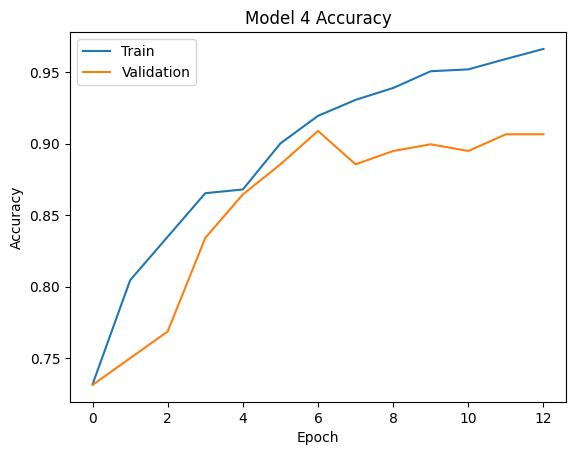

In [224]:
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('Model 4 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [225]:
# Evaluate the model on the test data.
accuracy = model4.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 0s - loss: 0.4112 - accuracy: 0.8968 - 408ms/epoch - 27ms/step


**Observations:**
* The model achieved a loss of 0.4112 and an accuracy of 89.68% on the test data.
* The accuracy indicates that the model performs well. 


In [226]:
# Obtain the output probabilities.
y_pred=model4.predict(X_test_normalized)

15/15 [==============================] - 1s 27ms/step


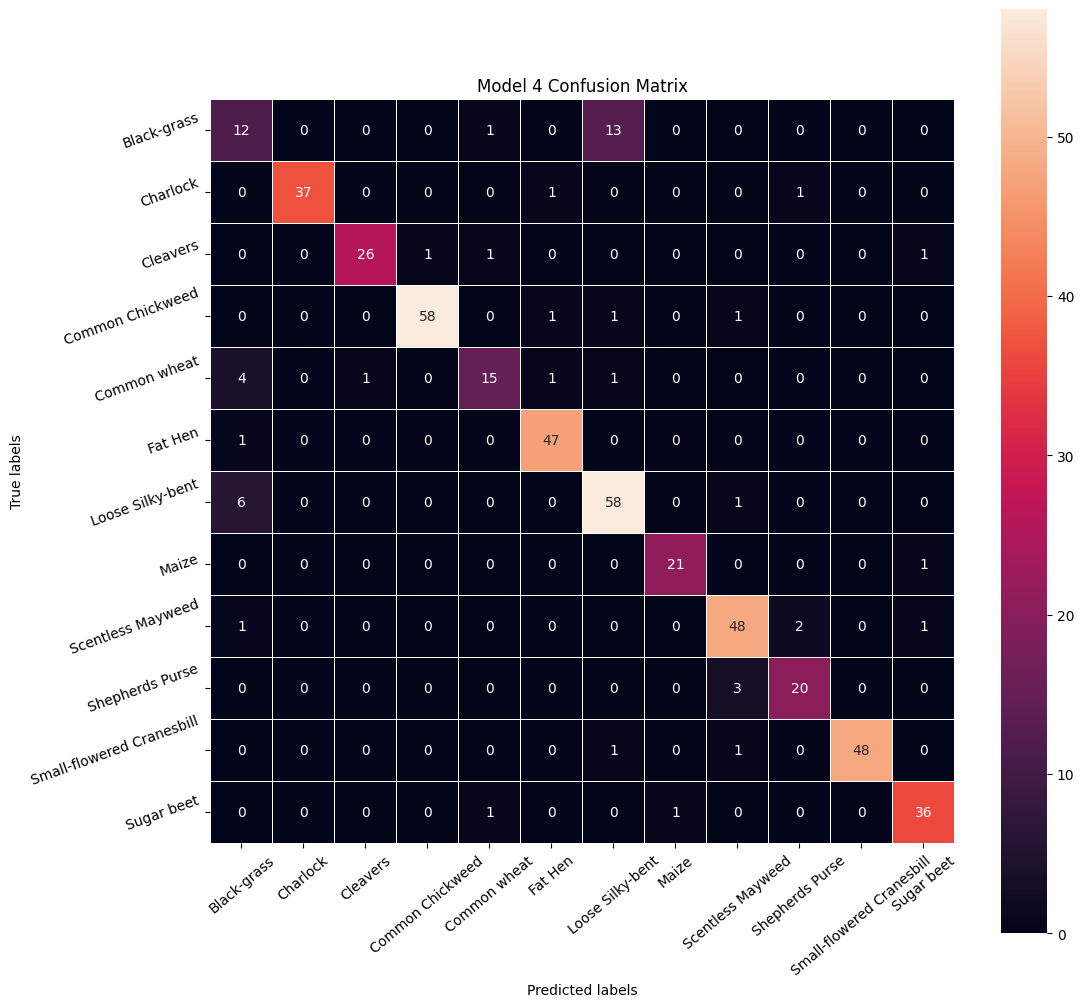

In [227]:
# Obtaining the categorical values from y_test_encoded and y_pred.
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined in tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg) 
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
# Setting the labels to both the axes
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Model 4 Confusion Matrix');
ax.xaxis.set_ticklabels(list(enc.classes_),rotation=40)
ax.yaxis.set_ticklabels(list(enc.classes_),rotation=20)
plt.show()

In [228]:
# Plotting the classification report
print("Model 4 Classification Report")
cr=metrics.classification_report(y_pred_arg, y_test_arg, zero_division=1)
print(cr)

Model 4 Classification Report
              precision    recall  f1-score   support

           0       0.46      0.50      0.48        24
           1       0.95      1.00      0.97        37
           2       0.90      0.96      0.93        27
           3       0.95      0.98      0.97        59
           4       0.68      0.83      0.75        18
           5       0.98      0.94      0.96        50
           6       0.89      0.78      0.83        74
           7       0.95      0.95      0.95        22
           8       0.92      0.89      0.91        54
           9       0.87      0.87      0.87        23
          10       0.96      1.00      0.98        48
          11       0.95      0.92      0.94        39

    accuracy                           0.90       475
   macro avg       0.87      0.89      0.88       475
weighted avg       0.90      0.90      0.90       475



**Obversations**
* The overall accuracy of the model is 90%. This indicates that the model correctly predicted 90% of the test samples.
* The macro average is the unweighted mean of the precision, recall, and F1-score for all classes. It indicates that, on average, the model has a precision of 87%, recall of 89%, and F1-score of 88%.

In [229]:
# Define a list of models and their names.
models = [
    (model1, 'Model 1'),
    (model2, 'Model 2'),
    (model3, 'Model 3'),
    (model4, 'Model 4')
]

# Print models performance.
for model, name in models:
    print(model_performance_classification_sklearn(model, X_test_normalized, y_test_original, name))

15/15 [==============================] - 0s 18ms/step
     Model  Accuracy    Recall  Precision        F1
0  Model 1  0.776842  0.776842   0.779542  0.774651
15/15 [==============================] - 0s 10ms/step
     Model  Accuracy    Recall  Precision        F1
0  Model 2  0.797895  0.797895   0.807582  0.796945
15/15 [==============================] - 3s 232ms/step
     Model  Accuracy    Recall  Precision       F1
0  Model 3  0.435789  0.435789   0.319426  0.35037
15/15 [==============================] - 0s 21ms/step
     Model  Accuracy    Recall  Precision        F1
0  Model 4  0.896842  0.896842   0.898085  0.896296


---
---
# Final Model

### Visualizing the prediction

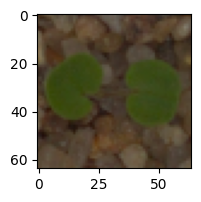

1/1 [==============================] - 0s 26ms/step
Predicted Label ['Small-flowered Cranesbill']
True Label Small-flowered Cranesbill


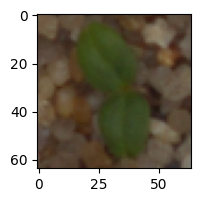

1/1 [==============================] - 0s 25ms/step
Predicted Label ['Cleavers']
True Label Cleavers


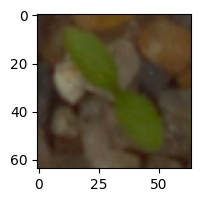

1/1 [==============================] - 0s 25ms/step
Predicted Label ['Common Chickweed']
True Label Common Chickweed


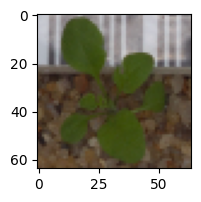

1/1 [==============================] - 0s 24ms/step
Predicted Label ['Shepherds Purse']
True Label Shepherds Purse


In [230]:
# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2,2))
plt.imshow(X_test[2])
plt.show()
## Complete the code to predict the test data using the final model selected
print('Predicted Label', enc.inverse_transform(model4.predict((X_test_normalized[2].reshape(1,64,64,3)))))   # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[2])                                               # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[33])
plt.show()
## Complete the code to predict the test data using the final model selected
print('Predicted Label', enc.inverse_transform(model4.predict((X_test_normalized[33].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[33])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[59],)
plt.show()
## Complete the code to predict the test data using the final model selected
print('Predicted Label', enc.inverse_transform(model4.predict((X_test_normalized[59].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[59])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[36])
plt.show()
## Complete the code to predict the test data using the final model selected
print('Predicted Label', enc.inverse_transform(model4.predict((X_test_normalized[36].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[36])                                                  # using inverse_transform() to get the output label from the output vector

---
---
# Actionable Insights and Business Recommendations

| Model   | Accuracy | Recall   | Precision | F1       |
|---------|----------|----------|-----------|----------|
| Model 1 | 0.776842 | 0.776842 | 0.779542  | 0.774651 |
| Model 2 | 0.797895 | 0.797895 | 0.807582  | 0.796945 |
| Model 3 | 0.435789 | 0.435789 | 0.319426  | 0.350370 |
| ** Model 4 | 0.896842 | 0.896842 | 0.898085  | 0.896296 |

Model 4 is the chosen model with a recall rate of 90%, precision of 90%, and an F1-score of 90%. This model performs superior compared to other models.

### Actionable Insights
* Data Augmentation: The original data set was primarily a standard view of a photo. Plant in frame, horizontally viewing and with similar background. All techniques should be used to improve identification. Include rotating, flipping, scaling, colors to help widen the data set features.
* Model Evaluation: Model 4 shows a 90% accuracy which is quite good but there is always room for improvement. With new data augmentation tweaks and a more robust data set contiunal improvements to the model can be made and possibly even lead to a new model selection.
* Ongoing Monitoring: As new data is provided to the system new model results need to be reviewed to ensure the proper training model is being used. 

### Business Recommendations
* Improve Data Collection: Improving any model requires data and this should be the top priority to ensure accurate plant predictions.
* Continuous Model Optimization: The models used should be continually running to improve based on new data collected.
* Create a Mobile App: Develop a mobile app to provide to users to add the data collection and also provide a wider variety of environments, backgrounds, colors, etc. to help improve predictions and handling of noise from the variety of photos.

_____